## Import Tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Download and prepare CIFAR10 Dataset

The CIFAR10 datasets contains 60,000 color images in 10 classes, with 6000 images in each class.The dataset is devided into 50,000 training images and 10,000 test images. The classes are mutually exclusive and there is no overlap between them.


In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

# Normalize pixel values to be between 0 to 1
train_images, test_images= train_images/ 250.0, test_images/ 250.0

170500096/170498071 [==============================] - 4s 0us/step


## Verify the data
To verify the dataset looks correct,let's plot the 1st 25 images form the training set and display the class name below each image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

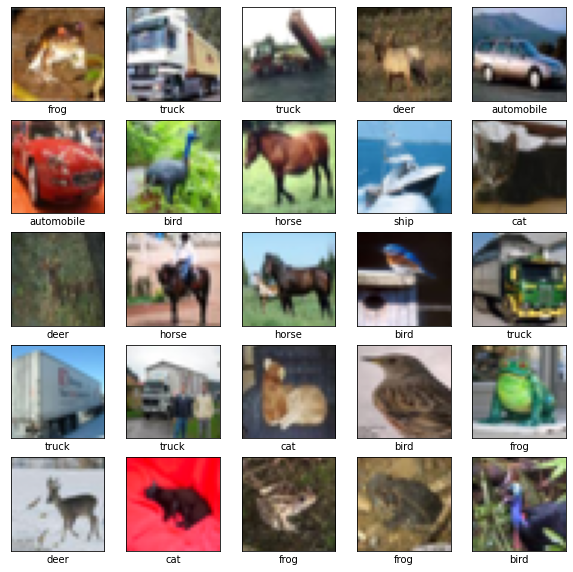

In [3]:
class_names = ['airplae','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  # The CIFAR lebels happen to be arrays,
  # which is why you need extra index.
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()



## Create the Convolutional base

The 6 lines of of code below define the convolution base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

<p style='text-align: justify;'> As input, a CNN takes tensor of shape(image_height,image_width, color_channels),ignoring the batch size. Color_Channels refers to (R,G,B).Here we will configure our CNN to process inputs of shape (32,32,3), which is the format of CIFAR images.We can do this by passing the argument input_shape to our first layer.</p>

In [4]:
 model= models.Sequential()
 model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)))
 model.add(layers.MaxPooling2D((2,2)))
 model.add(layers.Conv2D(64,(3,3),activation='relu'))
 model.add(layers.MaxPooling2D((2,2)))
 model.add(layers.Conv2D(64,(3,3),activation='relu'))

Let's display the architecture of our model so far.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above we can see that the output of every Conv2D and MaxPooling2D is a 3D tensor of shape (height, width, channels).The width and height dimensions tend to shrink as we go deeper in the network.The number of output channels for each Conv2D layer is controlled by the first argument(e.g. 32 or 64).Typically as the width and height shrink, we can afford(computationally) to add more output channels in the Conv2D layer.

## Add Dense Layers on Top
To complete our model, we will feed the last output tensor from the convolutional base (of shape (4,4,64)) into one or more dense layers to perform classification. Dense layers take vectors as inout (which is 1D)while the current output is 3D tensor.First we will flatten (or unroll)the 3D output to 1D.Then add one or more dense layers on top. CIFAR has 10 output classes, so we will use a final Dense layer with 10 outputs.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here the complete architecture of our model.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

As we see, our (4,4,64) outputs were flatten into vectors of shape (1024) before going through two dense layers.

## Compile and train the model

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history= model.fit(train_images,train_labels,epochs=10,
                   validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 39s 4ms/step - loss: 1.8029 - accuracy: 0.3299 - val_loss: 1.2562 - val_accuracy: 0.5493
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2150 - accuracy: 0.5713 - val_loss: 1.0938 - val_accuracy: 0.6142
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0652 - accuracy: 0.6243 - val_loss: 1.0884 - val_accuracy: 0.6209
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9610 - accuracy: 0.6631 - val_loss: 0.9546 - val_accuracy: 0.6696
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8872 - accuracy: 0.6922 - val_loss: 0.9383 - val_accuracy: 0.6755
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8298 - accuracy: 0.7091 - val_loss: 0.9008 - val_accuracy: 0.6930
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7798 - accuracy: 0.7259 - val_loss: 0.9100 - val_accuracy

## Evaluate the model

In [9]:
test_loss, test_acc= model.evaluate(test_images,test_labels, verbose=2)

313/313 - 1s - loss: 0.8526 - accuracy: 0.7109


In [10]:
print(test_acc)

0.7109000086784363


Our simple CNN has achieved a test accuracy score of 71% .